In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# import the some important Libraries
import numpy as np
import torch
from torch.utils.data import Dataset ,DataLoader,ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import cv2


In [32]:


tumor=[]
healthy=[]
# Use a more specific glob pattern to ensure you're only selecting image files
for f in glob.iglob("/content/drive/MyDrive/Mri_project_code/data/brain_tumor_dataset/yes/*.jpg"): # or appropriate image extension
        img =cv2.imread(f)

        img =cv2.resize(img,(128,128))
        b, g, r=cv2.split(img)
        img=cv2.merge([r,g,b])
        tumor.append(img)

for f in glob.iglob("/content/drive/MyDrive/Mri_project_code/data/brain_tumor_dataset/no/*.jpg"): # or appropriate image extension
        img =cv2.imread(f)

        img =cv2.resize(img,(128,128))
        b, g, r=cv2.split(img)
        img=cv2.merge([r,g,b])
        healthy.append(img)


In [33]:
healthy=np.array(healthy)
tumor=np.array(tumor)
All = np.concatenate((healthy,tumor))

In [34]:
tumor.shape

(86, 128, 128, 3)

In [35]:
All.shape

(171, 128, 128, 3)

In [36]:
healthy.shape

(85, 128, 128, 3)

In [37]:
np.random.choice(10,5,replace=False)

array([1, 5, 6, 4, 2])

In [38]:
healthy[0].shape

(128, 128, 3)

In [39]:
# Visualization Brain Mri

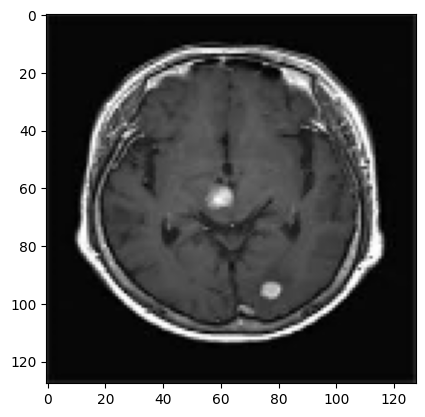

In [40]:

plt.imshow(healthy[5])

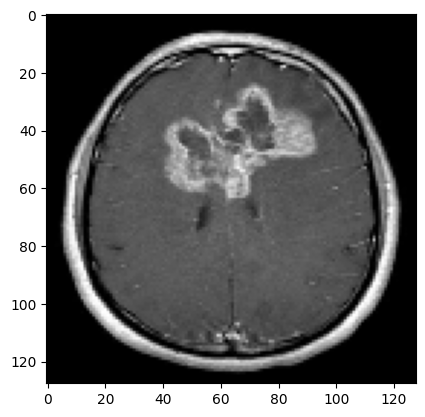

In [41]:
plt.imshow(tumor[9])

In [42]:
def plot_random(healthy,tumor,num=5):
  healthy_imgs=healthy[np.random.choice(healthy.shape[0],num,replace=False)]
  tumor_imgs=tumor[np.random.choice(tumor.shape[0],num,replace=False)]

  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title("Healthy")
    plt.imshow(healthy_imgs[i])

  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title("Tumor")
    plt.imshow(tumor_imgs[i])





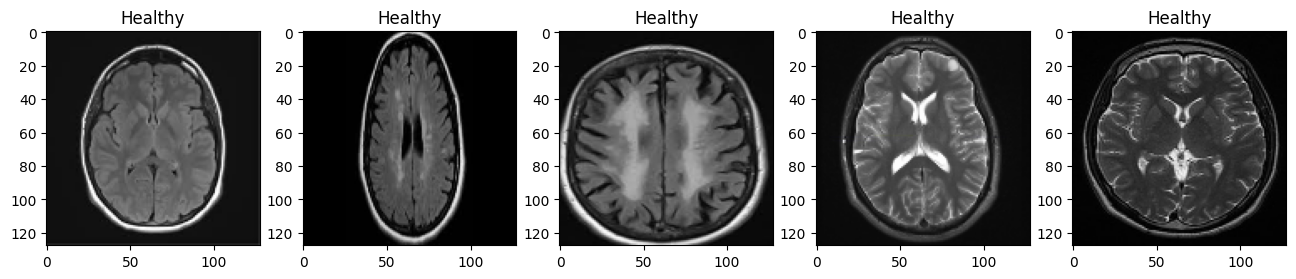

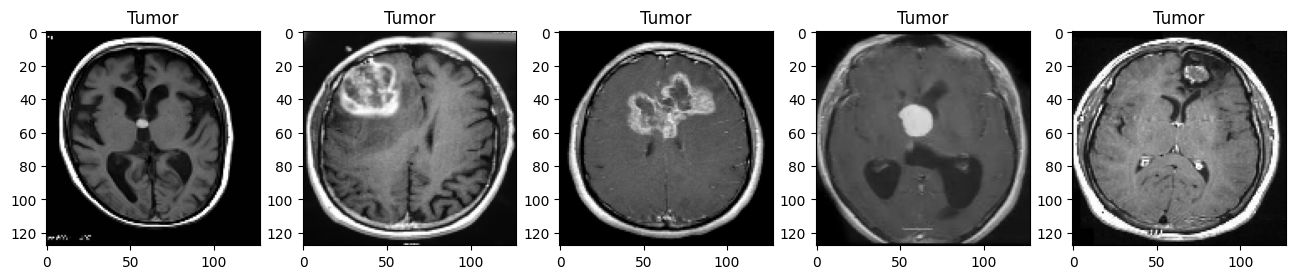

In [43]:
plot_random(healthy,tumor)

In [44]:
## Create torch Dataset Class


In [45]:
class Dataset(object):
  def __getitem__(self,index):
    raise NotImplementedError

  def __len__(self):
    raise NotImplementedError

  def __add__(self,other):
    return ConcatDataset([self,other])



In [46]:
class MRI(Dataset):
  def __init__(self,scores):
    self.x=scores
  def __getitem__(self,index) :
    return self.x[index]

  def __len__(self)  :
    return len(self.x)

  def __add__(self,other)  :
    return ConcatDataset([self.x,s1])

In [47]:
# Creating MRI custom class

In [48]:
class MRI(Dataset):
  def __init__(self):



    tumor=[]
    healthy=[]
    # Use a more specific glob pattern to ensure you're only selecting image files
    for f in glob.iglob("/content/drive/MyDrive/Mri_project_code/data/brain_tumor_dataset/yes/*.jpg"): # or appropriate image extension
            img =cv2.imread(f)

            img =cv2.resize(img,(128,128))
            b, g, r=cv2.split(img)
            img=cv2.merge([r,g,b])
            tumor.append(img)

    for f in glob.iglob("/content/drive/MyDrive/Mri_project_code/data/brain_tumor_dataset/no/*.jpg"): # or appropriate image extension
            img =cv2.imread(f)

            img =cv2.resize(img,(128,128))
            b, g, r=cv2.split(img)
            img=cv2.merge([r,g,b])
            healthy.append(img)


    healthy=np.array(healthy,dtype=np.float32)
    tumor=np.array(tumor,dtype=np.float32)


    # Our labels
    tumor_label=np.ones(tumor.shape[0],dtype='float32')
    healthy_label=np.zeros(healthy.shape[0],dtype='float32')

    # Concatenate
    self.images=np.concatenate((tumor,healthy),axis=0)
    self.labels=np.concatenate((healthy_label,tumor_label))



  def __len__(self):
    return self.images.shape[0]

  def __getitem__(self,index):
    sample= {"image":self.images[index],"label":self.labels[index]}

    return sample

  def normalize(self):
     self.images=self.images/255.0

In [49]:
mri =MRI()

In [50]:
mri.normalize()

In [51]:
# Creating a data Loader

In [52]:
# the world without Data loader

In [53]:
import random
import sys
index=list(range(len(mri)))
random.shuffle(index)

for idx in index:
  sample= mri[idx]
  img=sample['image']
  # print(img.shape)
  # img=img.reshape(img.shape[1],img.shape[2],img.shape[0])

  plt.imshow(img)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

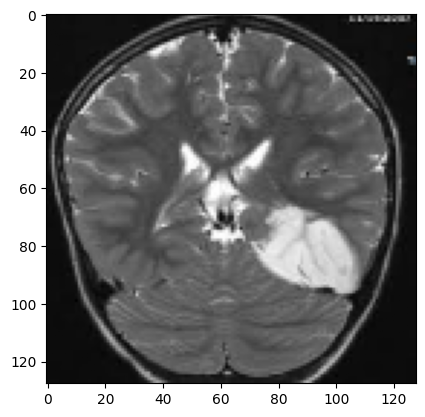

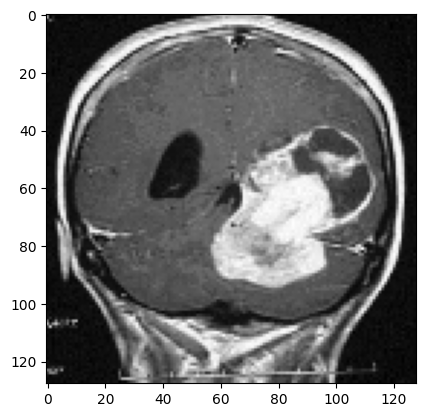

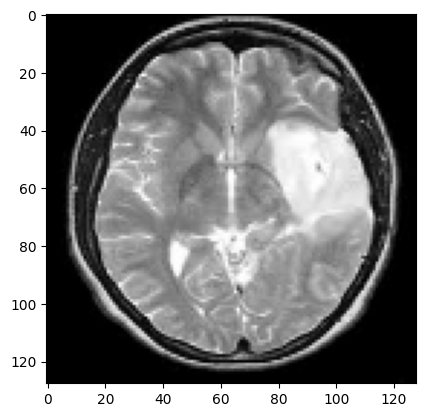

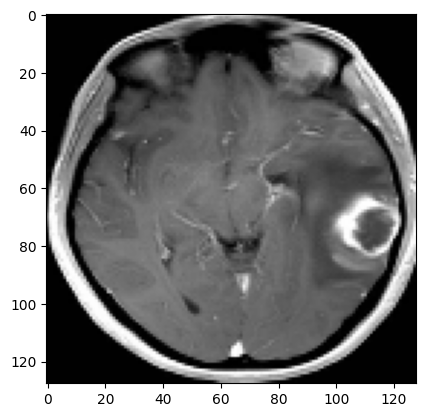

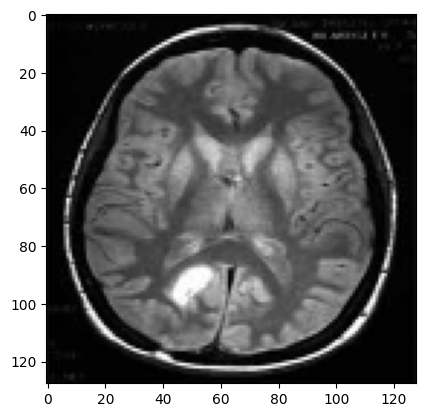

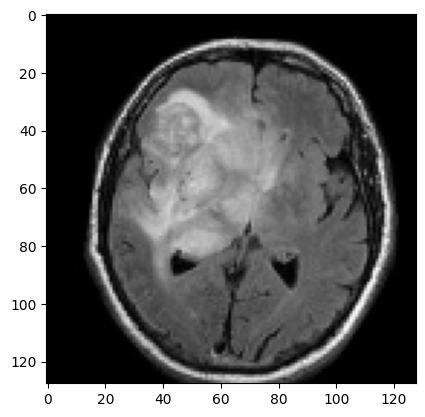

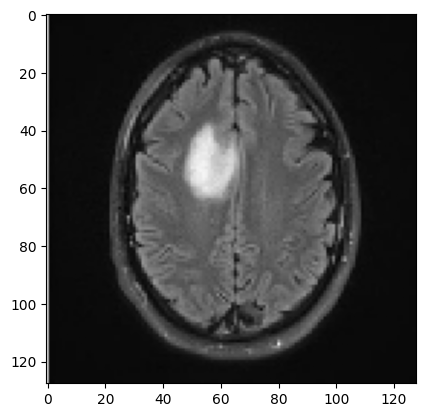

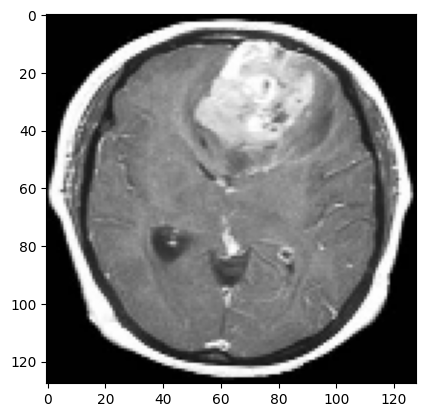

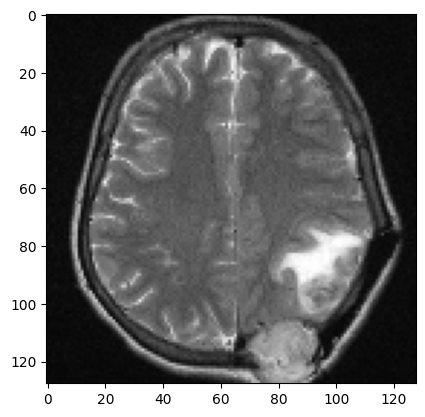

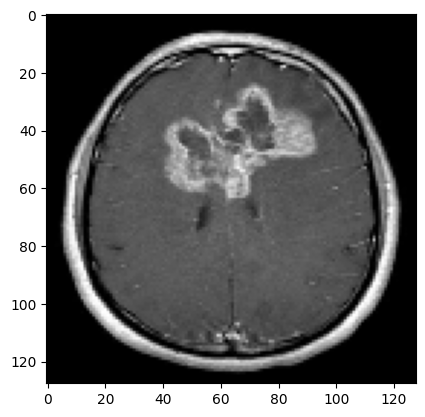

In [54]:
it = iter(mri)
for i in range(10):
  sample=next(it)
  img=sample['image']
  # print(img.shape)
  # img=img.reshape(img.shape[1],img.shape[2],img.shape[0])

  plt.imshow(img)
  plt.show()

In [55]:
# the world with data loader


In [56]:
dataloader = DataLoader(mri,batch_size=32,shuffle=True)

In [64]:
## own code


# for sample in dataloader:
#   img =sample['image'].squeeze()
#   img = img.permute(1, 2, 0, 3)  # Change the order of dimensions
#   img = img.reshape(img.shape[0], img.shape[1], -1)  # Combine the last two dimensions
#   # plt.imshow(img)
#   plt.show()

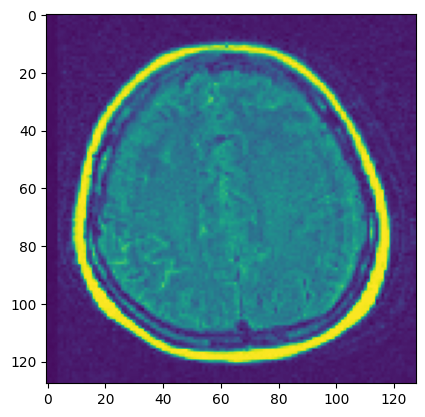

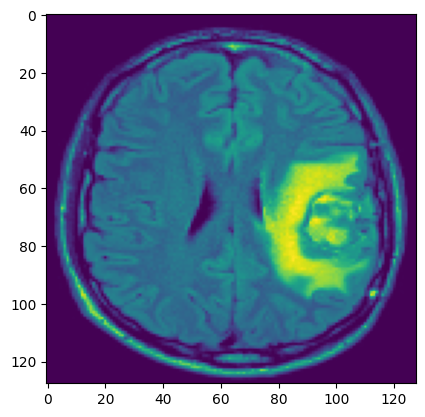

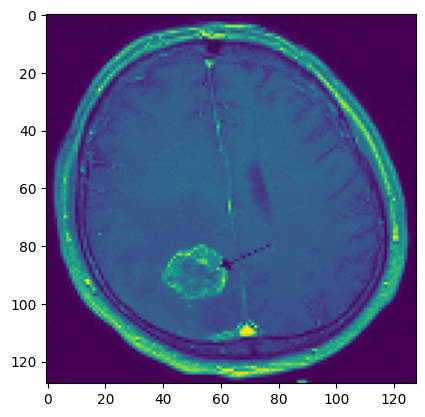

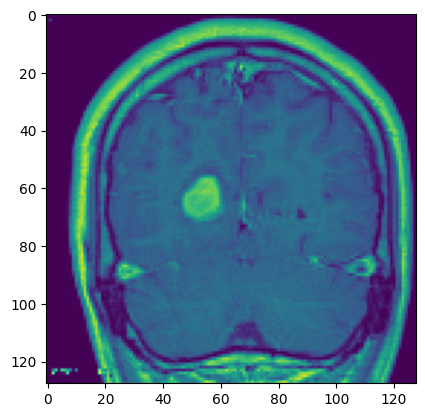

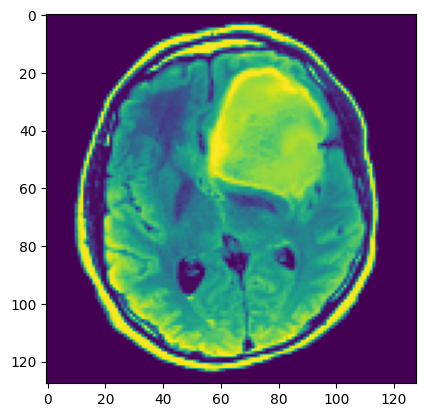

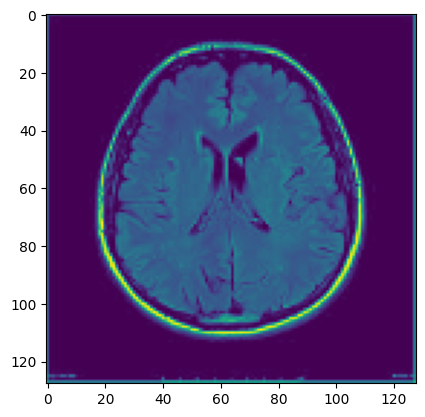

In [63]:
############################### gimini code

for sample in dataloader:
  img =sample['image'].squeeze()
  img = img.permute(1, 2, 0, 3)  # Change the order of dimensions
  img = img.reshape(img.shape[0], img.shape[1], -1)  # Combine the last two dimensions

  # Select a single channel or average over channels to get a 2D image
  img_2d = img[:,:,0] # Select the first channel (adjust index as needed)
  # img_2d = img.mean(dim=2) # Average over all channels

  plt.imshow(img_2d)
  plt.show()

In [69]:
import torch.nn as nn
import torch.nn.functional as F

In [76]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): # Changed nn.module to nn.Module
  def __init__(self):
    super(CNN,self).__init__()
    # self.conv1=nn.Conv2d()
# self.conv2=nn.Conv2d()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2),

        # Indent the following lines to be part of the sequential model

        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=2)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(in_features=256,out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120,out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84,out_features=1),
        nn.Sigmoid() # Sigmoid is already included in the sequential model
    )

  def forward(self,x): # Unindent the forward method to be at the same level as __init__
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    # x = F.sigmoid(x)  # Remove duplicate sigmoid activation
    return x